## Telco Customer Churn Analysis
****
#### Objective:
The goal of this project is to analyze customer churn in a telecommunications company using Exploratory Data Analysis (EDA). By understanding key factors contributing to churn, the project provides actionable insights and recommendations to improve customer retention strategies.

#### Data Source:
- [IBM Sample Data Sets (Kaggle)](https://www.kaggle.com/blastchar/telco-customer-churn) 
- This dataset is provided by **IBM** and is publicly available on **Kaggle**
- After downloading it from the above link, rename the file to: **TelcoCustomerChurn.csv**
- Place it in the same directory as the notebook

#### Dataset Description:
This telecommunication company's dataset contains information about:

- **Churn**: Customers who left within the last month
- **Services**: The services that each customer has signed up for — phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- **Customer Account Information**: How long customers have been with the company i.e., tenure (in months), contract type, payment method, paperless billing, monthly charges, and total charges
- **Demographic Info**: Customer demographics including gender, senior citizen or not, and whether they have partners and dependents


---

### Step 1: Understanding the Dataset
- To get overall information about dataset

In [4]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading Dataset into dataframe
df=pd.read_csv('TelcoCustomerChurn.csv')

# Displaying 1st 5 rows 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape # To get number of rows and columns

(7043, 21)

In [7]:
df.isnull().sum() # To get number of null values in each column

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df[df.duplicated()] #to get all dupliacted rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [9]:
df.info() # Basic info about columns and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.describe() # To get descriptive statistics of numeric cols

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
df.describe(include=['object']) # To get descriptive statistics of the rest of the object dtype columns

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [12]:
# To find typos in categories 
for col_name in df.columns:
    print(col_name,':\n',df[col_name].unique(),'\n')

customerID :
 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

gender :
 ['Female' 'Male'] 

SeniorCitizen :
 [0 1] 

Partner :
 ['Yes' 'No'] 

Dependents :
 ['No' 'Yes'] 

tenure :
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

PhoneService :
 ['No' 'Yes'] 

MultipleLines :
 ['No phone service' 'No' 'Yes'] 

InternetService :
 ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity :
 ['No' 'Yes' 'No internet service'] 

OnlineBackup :
 ['Yes' 'No' 'No internet service'] 

DeviceProtection :
 ['No' 'Yes' 'No internet service'] 

TechSupport :
 ['No' 'Yes' 'No internet service'] 

StreamingTV :
 ['No' 'Yes' 'No internet service'] 

StreamingMovies :
 ['No' 'Yes' 'No internet service'] 

Contract :
 ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling :
 ['Yes' 'No'] 

PaymentM

**Observations (Step 1: Understanding Dataset)** : 
- The dataset contains 7043 rows and 21 columns.
- Irrelevant column:
   - customerID is not useful for the objective
- Missing Values:
   - TotalCharges has 11 missing values.
- Data Types Issues:
   - TotalCharges is object type but should be float.
   - SeniorCitizen is int type but represents a category.
- Numerical Columns:
   - tenure, MonthlyCharges, TotalCharges
- Categorical Columns: 
   - All other columns are categorical

---

### Step 2: Data Cleaning and Preprocessing
- Drop irrelevant column (customerID)
- Fix data types
- Handle missing values

In [15]:
# Making copy to work safely
df_copy=df.copy() 

# Drop customerID as it's not useful
df_copy.drop(columns='customerID',inplace=True) 

# Changing SeniorCitizen to category
df_copy['SeniorCitizen']=df_copy['SeniorCitizen'].astype('category')

# Convert TotalCharges to numeric (handle coercion)
df_copy['TotalCharges']=pd.to_numeric(df_copy['TotalCharges'],errors='coerce')

# Convert all object columns to category
obj_col_names = df_copy.select_dtypes(include='object').columns
for obj_col_name in obj_col_names:
    df_copy[obj_col_name]=df_copy[obj_col_name].astype('category')

# Confirm changes
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

In [16]:
# Check nulls in TotalCharges
df_copy['TotalCharges'].isnull().sum()

11

In [17]:
# Check nulls % in TotalCharges
df_copy['TotalCharges'].isnull().sum() * 100 / len(df_copy) 

0.15618344455487718

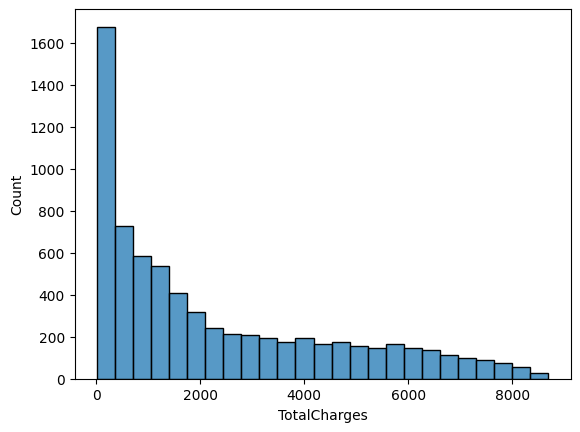

In [18]:
# To check distribution of TotalCharges
sns.histplot(df_copy['TotalCharges'])
plt.show()

In [19]:
# Descriptive stats of TotalCharges
df_copy['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [20]:
# Impute with median
df_copy['TotalCharges']=df_copy['TotalCharges'].fillna(df_copy['TotalCharges'].median()) 

# Confirm no nulls left
df_copy['TotalCharges'].isnull().sum()

0

In [21]:
df=df_copy # Assigning copy back to original df

**Observations (Step 2: Data Cleaning)**:
- ~ 0.16% rows were null in TotalCharges
- Imputed with median as its distribution is not perfectly normal (right skewed)

---

### Step 3 : Univariate Analysis
- For Numerical Variable : Use describe() and histograms and boxplots to understand distribution and detect potential outliers.
- For Categorical Variable : Use value_counts() and countplots to understand category distribution.

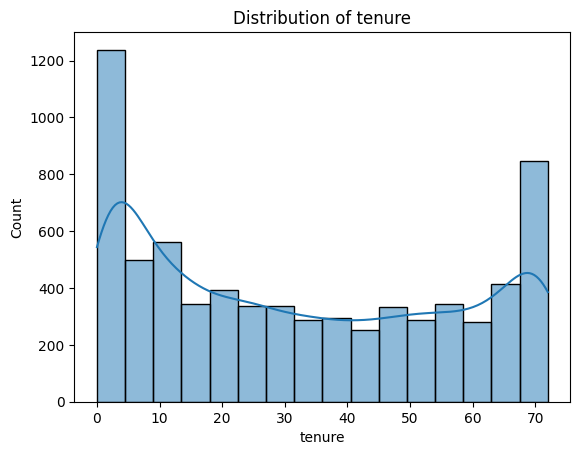

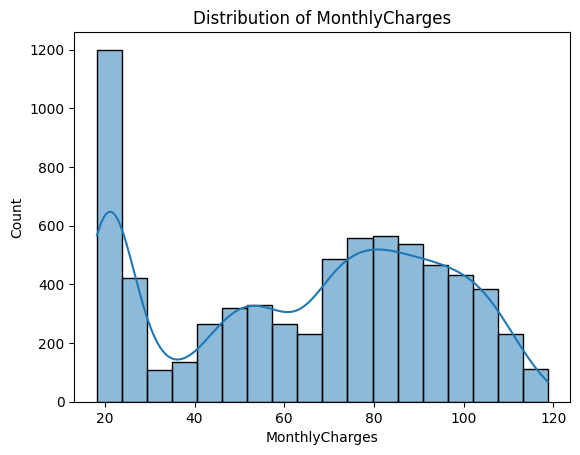

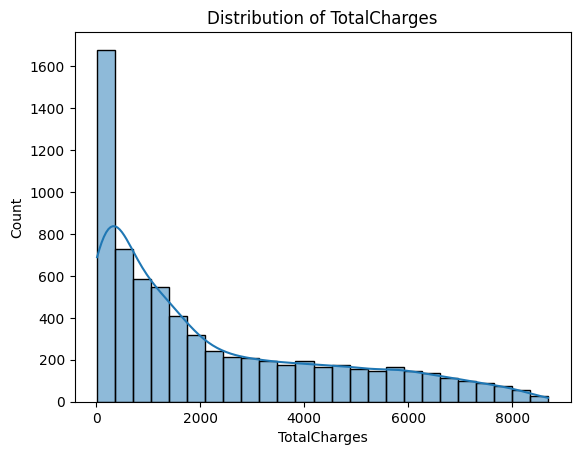

In [24]:
# Numerical Variable Univariate Analysis

num_col_names = df.select_dtypes(exclude='category').columns

# Histplot for each numerical variable
for num_col_name in num_col_names:
    sns.histplot(df[num_col_name],kde=True)
    plt.title(f'Distribution of {num_col_name}')
    plt.show() 

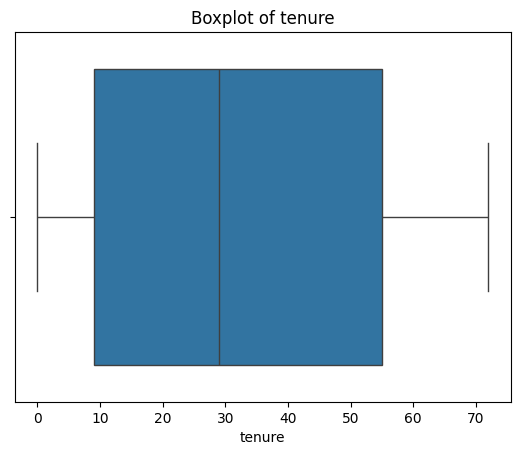

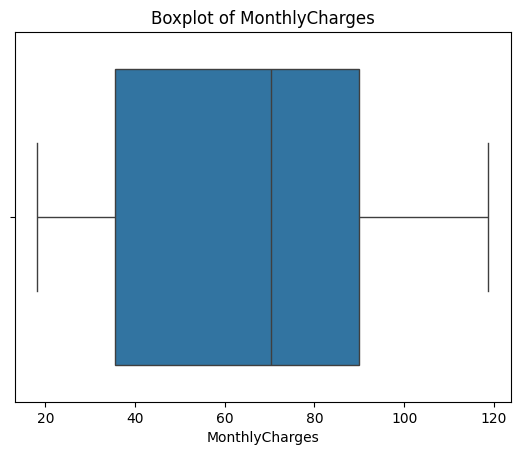

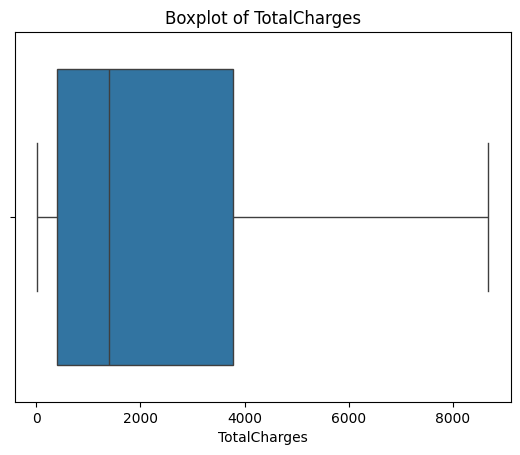

In [25]:
# Boxplots for each numerical variable
for num_col_name in num_col_names:
    sns.boxplot(x=df[num_col_name])
    plt.title(f'Boxplot of {num_col_name}')
    plt.show() 

In [26]:
# Descriptive statistics of each numerical variable
df[num_col_names].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


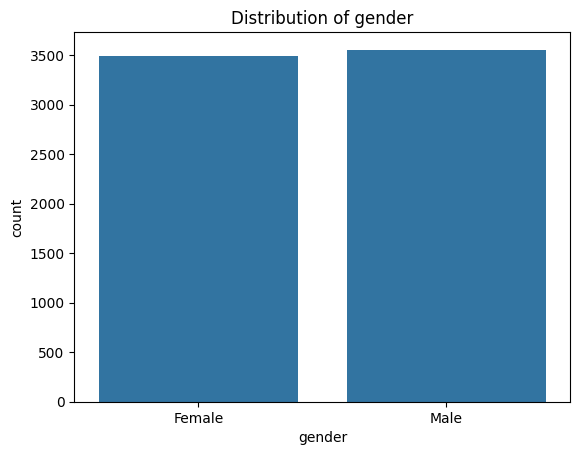

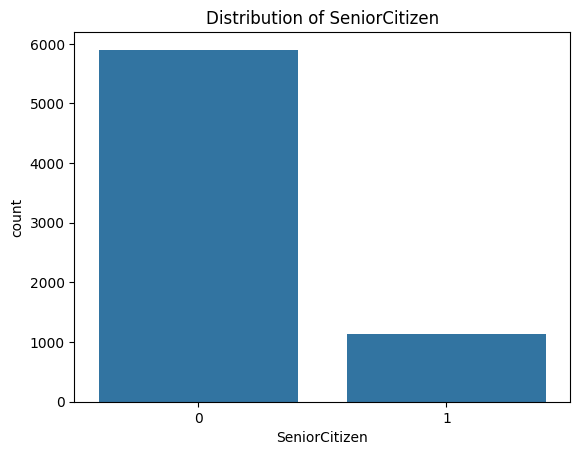

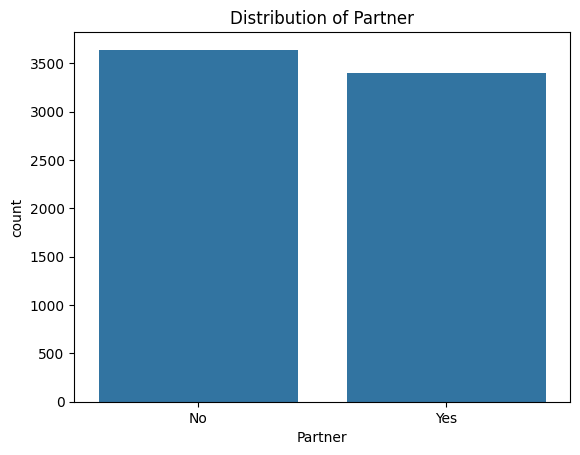

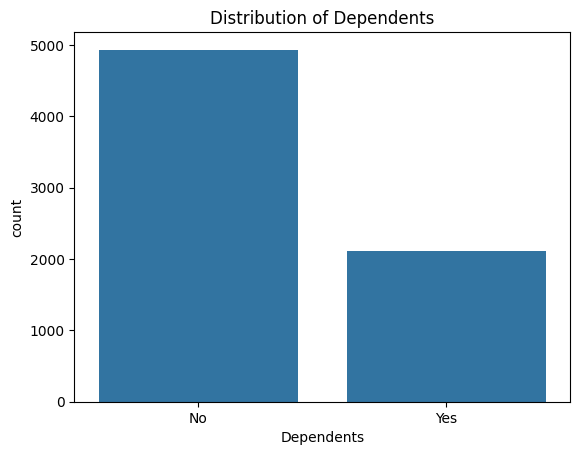

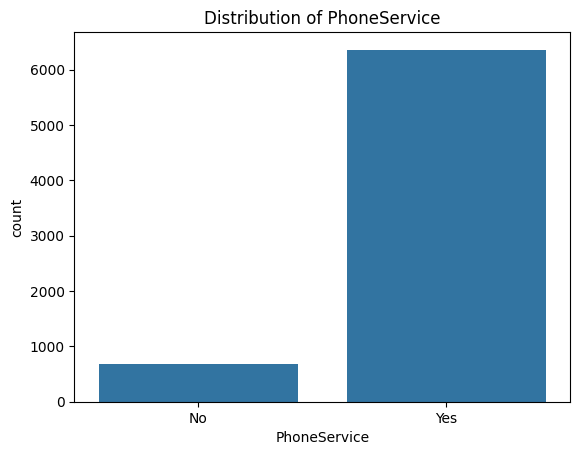

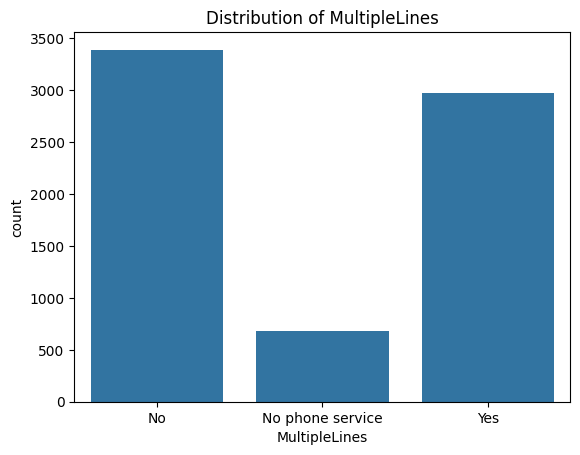

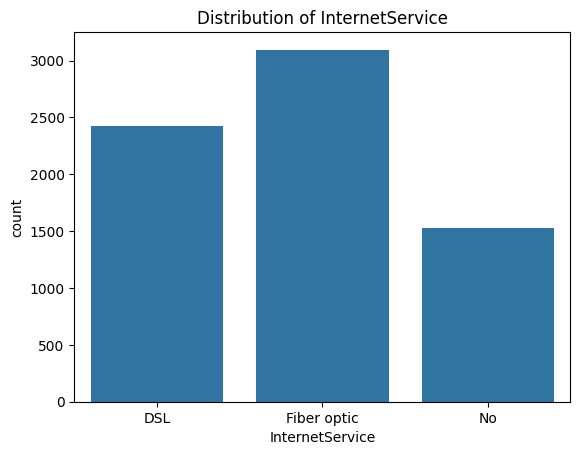

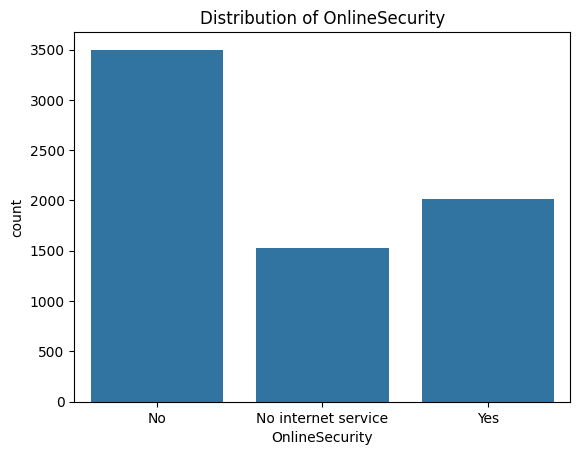

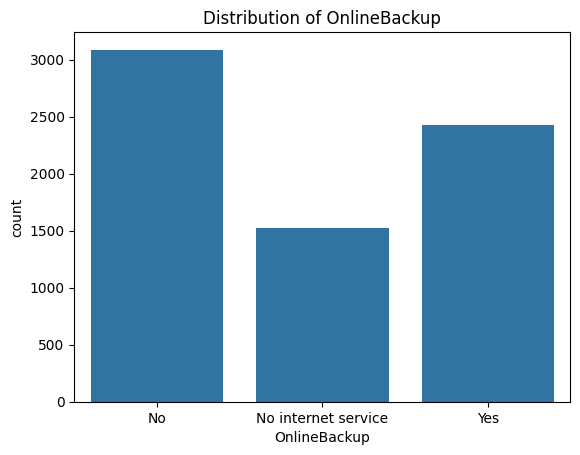

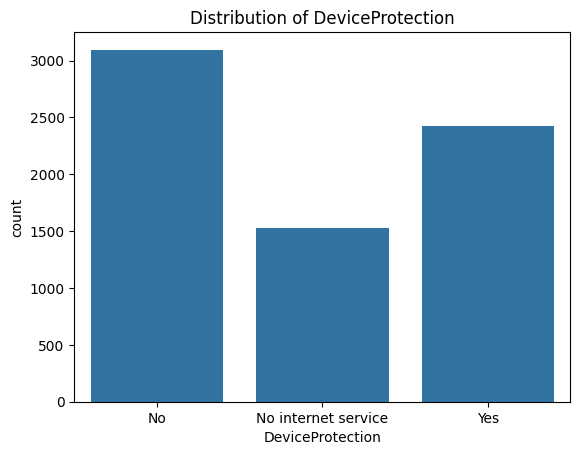

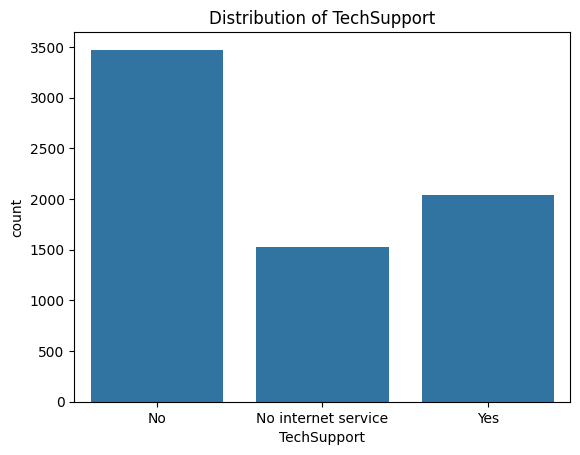

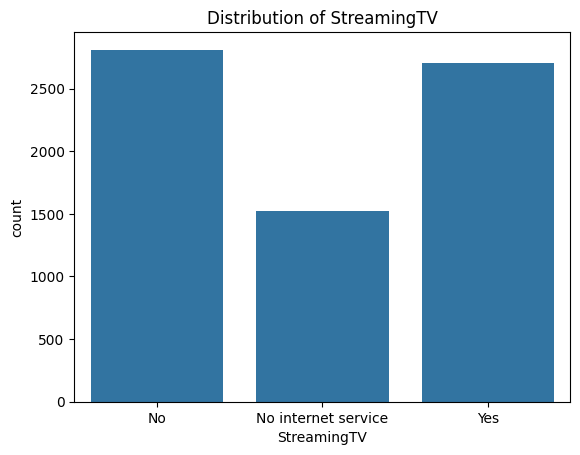

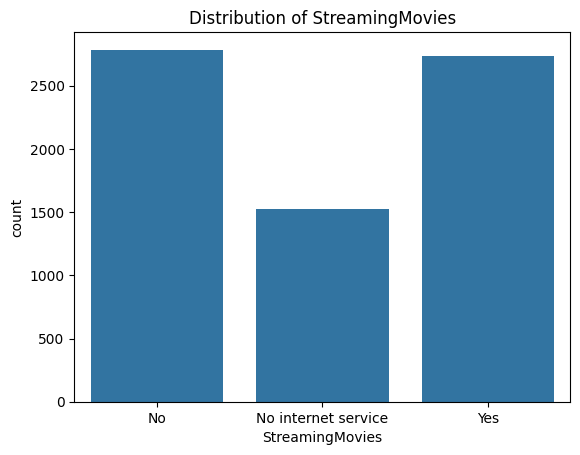

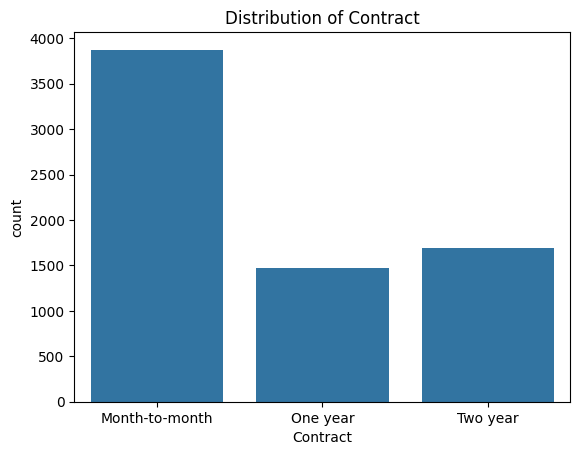

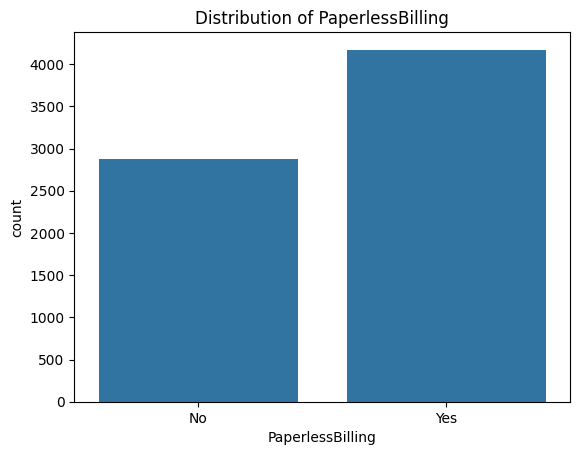

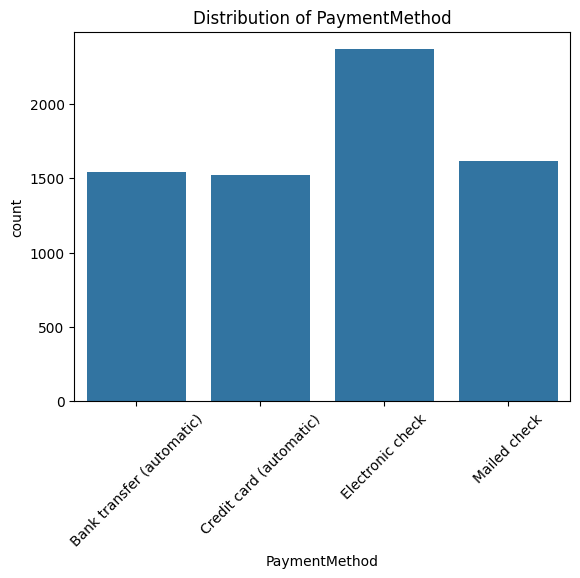

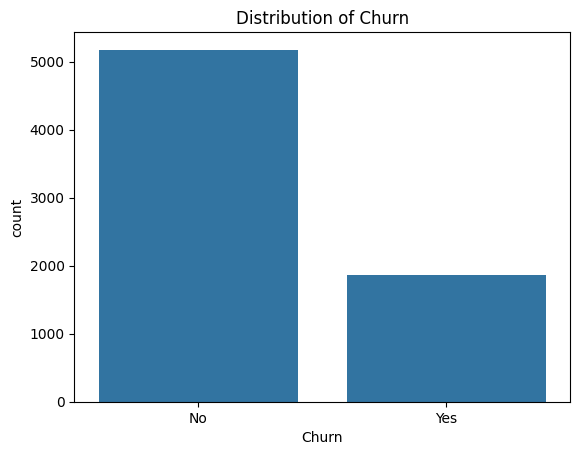

In [27]:
# Categorical columns univariate analysis

cat_col_names = df.select_dtypes(include='category').columns

# Count Plot for each categorical column
for cat_col_name in cat_col_names:
    sns.countplot(x=df[cat_col_name])
    plt.title(f'Distribution of {cat_col_name}')
    if cat_col_name=='PaymentMethod':
        plt.xticks(rotation=45)    
    plt.show() 

In [28]:
# Value counts for each categorical column
for cat_col_name in cat_col_names:
    vc = df[cat_col_name].value_counts()
    pct = (df[cat_col_name].value_counts(normalize=True) * 100).round(2)
    print(f"Value Counts of {cat_col_name}:\n{vc}\n")
    print(f"Percentage Distribution of {cat_col_name}:\n{pct}\n")

Value Counts of gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Percentage Distribution of gender:
gender
Male      50.48
Female    49.52
Name: proportion, dtype: float64

Value Counts of SeniorCitizen:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Percentage Distribution of SeniorCitizen:
SeniorCitizen
0    83.79
1    16.21
Name: proportion, dtype: float64

Value Counts of Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Percentage Distribution of Partner:
Partner
No     51.7
Yes    48.3
Name: proportion, dtype: float64

Value Counts of Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Percentage Distribution of Dependents:
Dependents
No     70.04
Yes    29.96
Name: proportion, dtype: float64

Value Counts of PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Percentage Distribution of PhoneService:
PhoneService
Yes    90.32
No      9.68
Name: proportion, dtype: float64

Value 

**Observations (Step 3: Univariate Analysis)**:

- **Numerical Variables**:
   - None of them follow a perfectly normal distribution.
   - No major outliers detected.
   - TotalCharges is right-skewed.
   - Over half of the customers have total charges less than 1500.
****
- **Categorical Variables**:

    Demographic:
    - Gender: Balanced distribution between male and female customers.
    - SeniorCitizen: Only 16% of customers are senior citizens.
    - Partner: Nearly equal distribution of customers with and without a partner.
    - Dependents: Only 30% of customers have dependents.

    Services:
    - PhoneService: 90% of customers have phone service, indicating it is a core offering.
    - MultipleLines: Almost half of the customers, having phone service, dont have multiple lines.
    - InternetService: 89% of customers have internet service. 
    - OnlineSecurity / OnlineBackup / DeviceProtection / TechSupport / StreamingMovies / StreamingTV: More than half of customers with internet service lacks these add-ons.

    Account Info:
    - Contract: More than half of the customers are on month-to-month contracts
    - PaperlessBilling: 59% of customers use paperless billing.
    - PaymentMethod: Electronic check is the most popular payment method, used by 33% of customers.
     
    Churn:
    - Churn rate is 26.54%, indicating a need for retention strategies.

---

### Step 4: Bivariate/Multivariate Analysis
- Visualising each variable with Churn
- Pair plot & Correlation heatmap (for numerical variables)

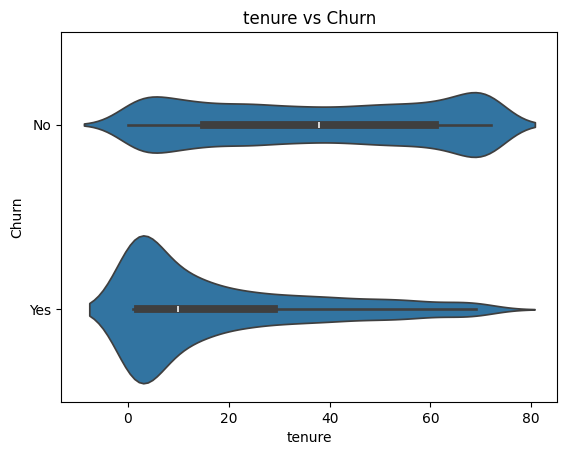

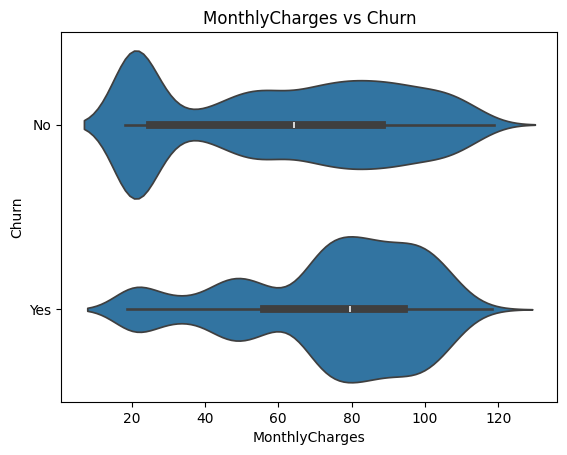

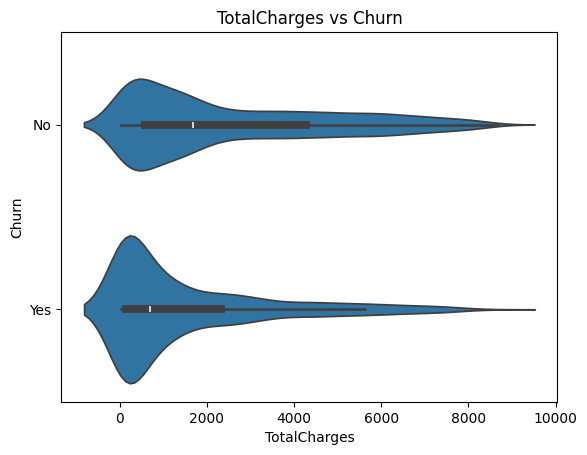

In [31]:
# Numerical vs Churn
for num_col_name in num_col_names:
    sns.violinplot(x=df[num_col_name],y=df['Churn'])
    plt.title(f'{num_col_name} vs Churn')
    plt.show()

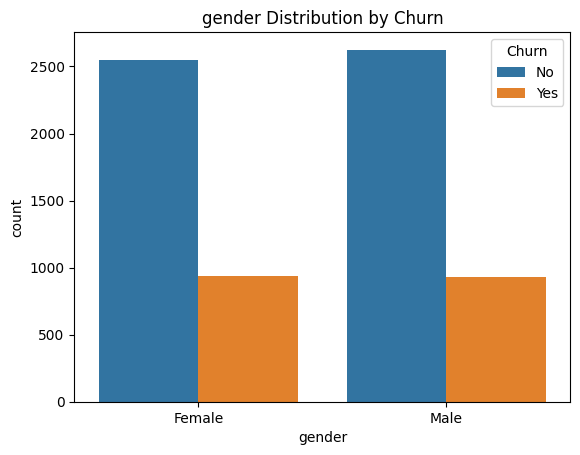

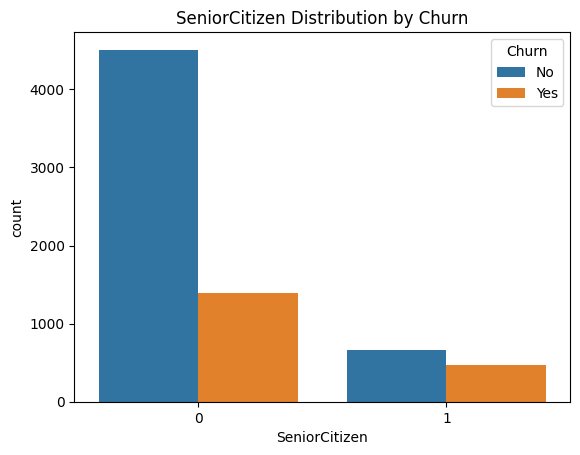

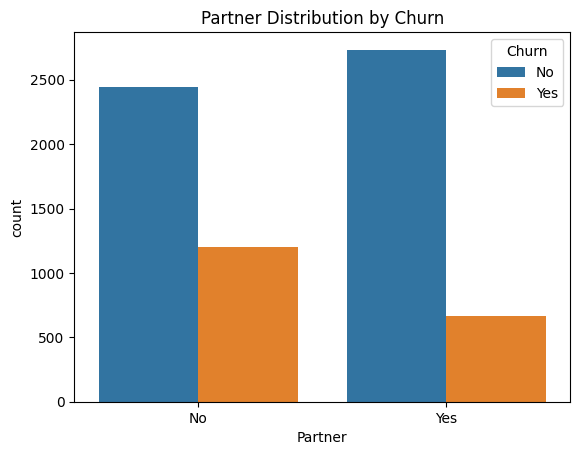

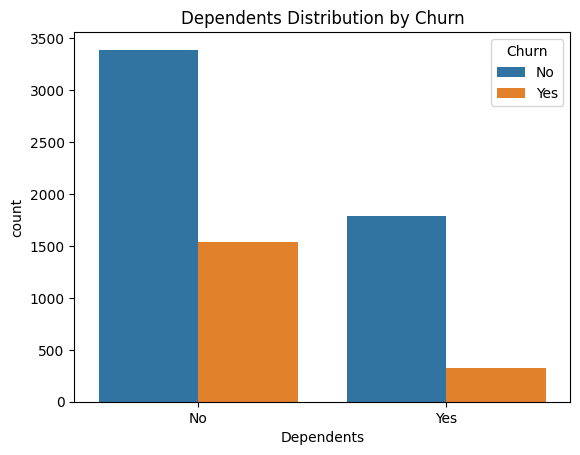

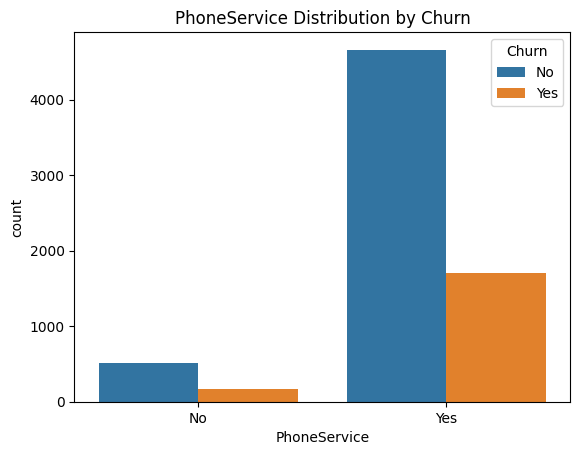

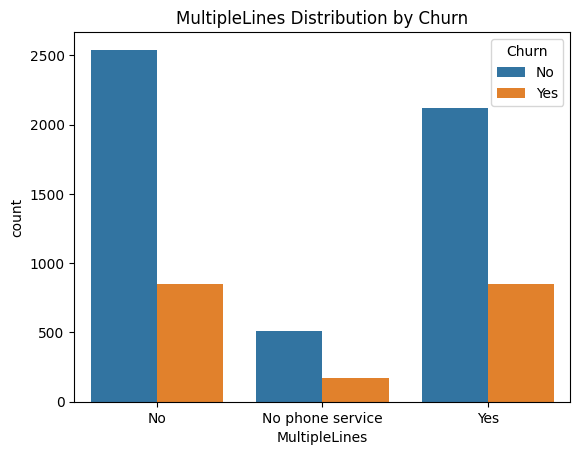

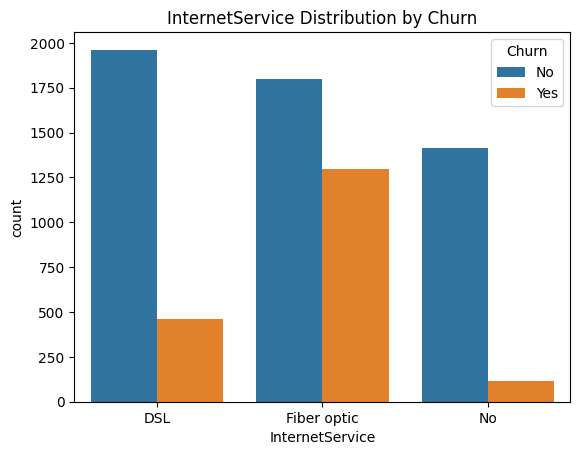

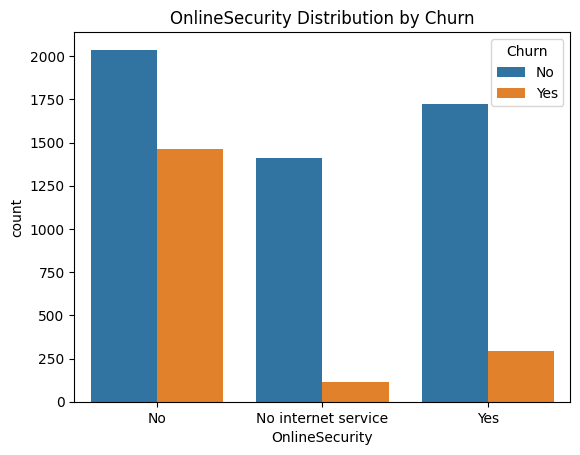

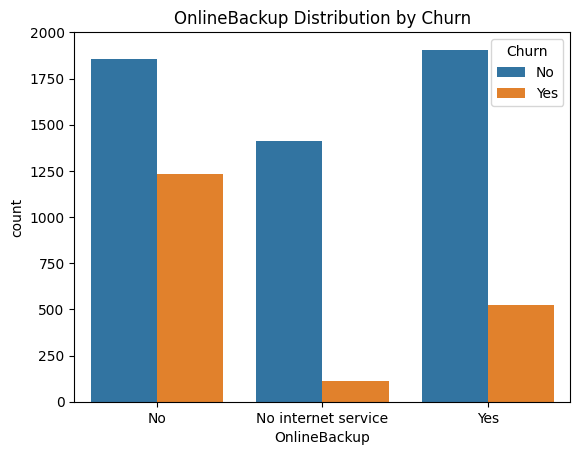

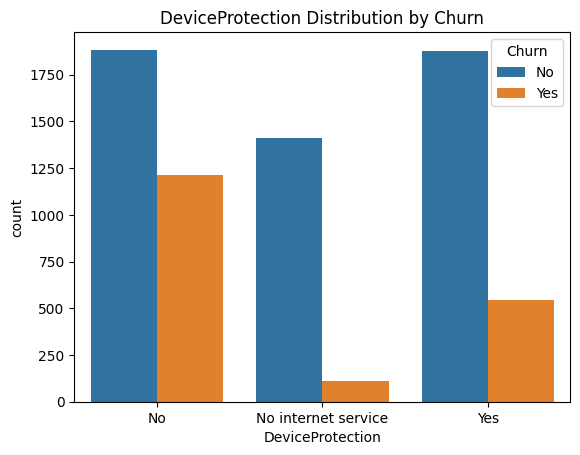

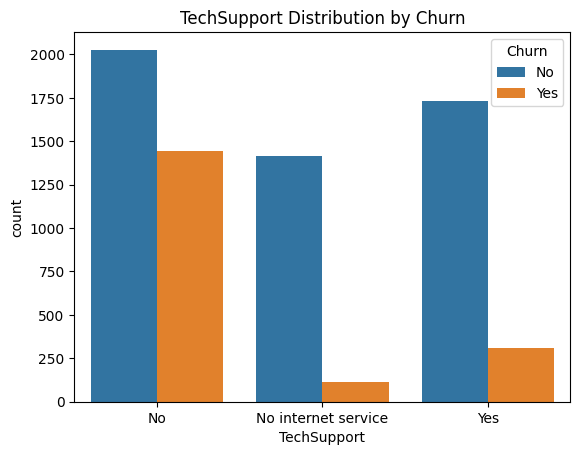

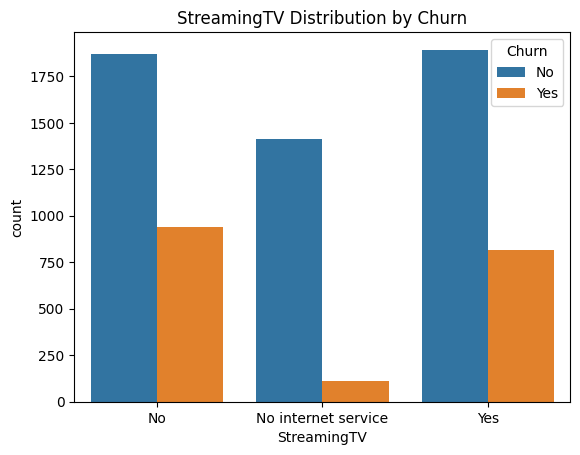

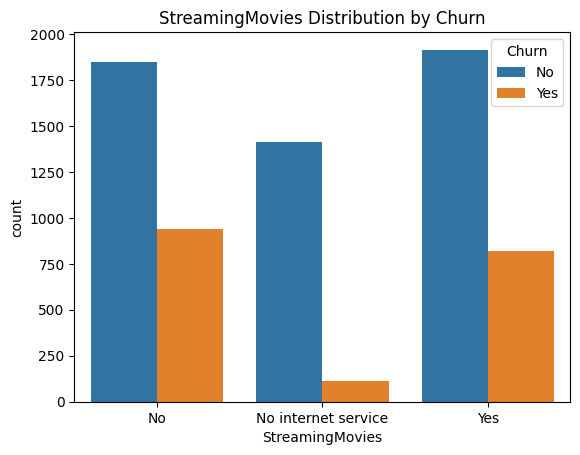

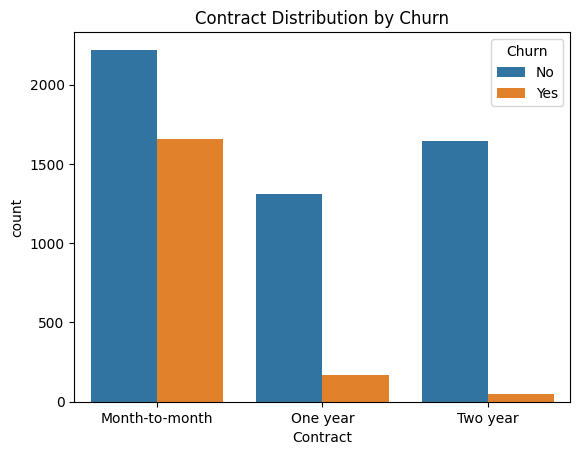

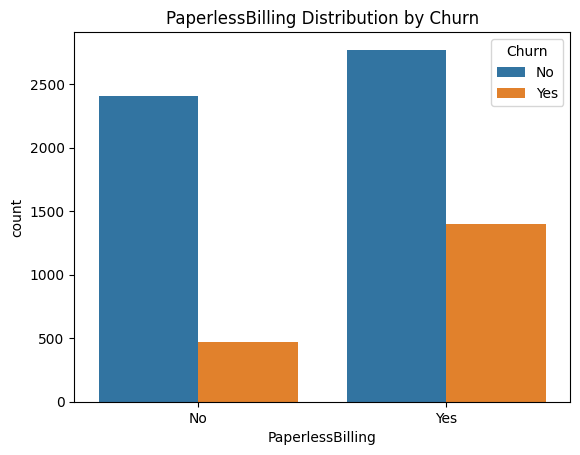

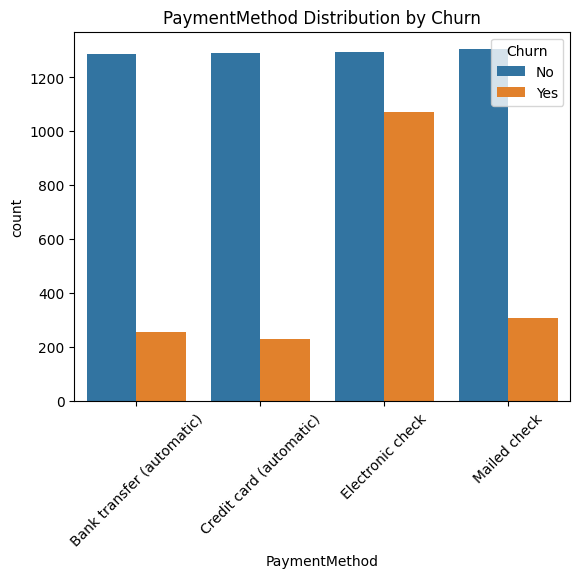

In [32]:
# Categorical vs Churn
cat_col_names = df.drop(columns='Churn').select_dtypes(include='category').columns
for cat_col_name in cat_col_names:
    sns.countplot(x=cat_col_name,hue='Churn',data=df)
    plt.title(f'{cat_col_name} Distribution by Churn')
    plt.xticks(rotation=45 if cat_col_name=='PaymentMethod' else 0)
    plt.show()

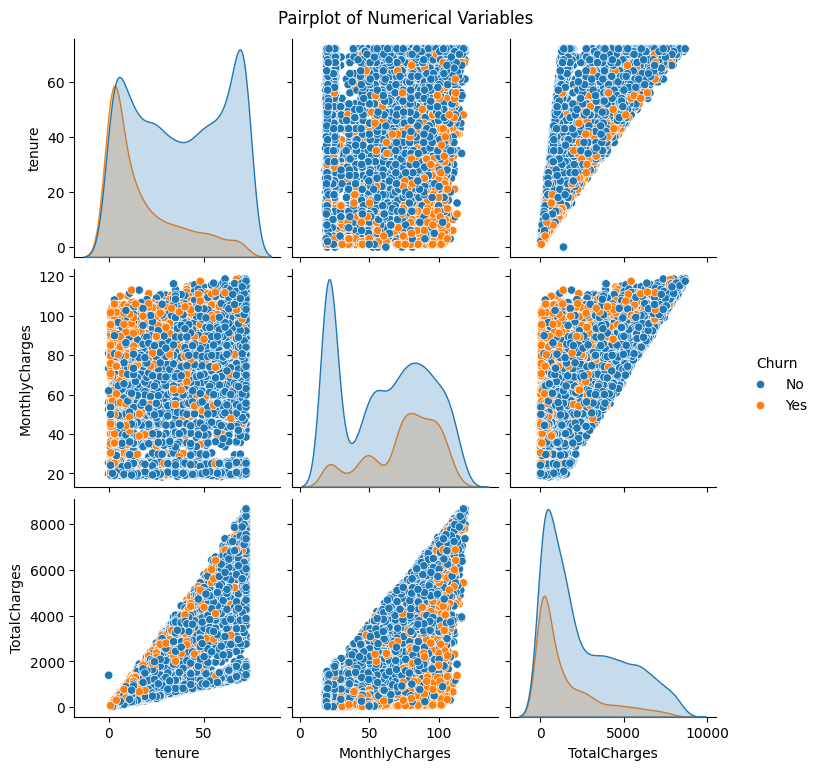

In [33]:
# Pairplot (for numerical variable)
sns.pairplot(df,hue='Churn')
plt.suptitle('Pairplot of Numerical Variables',y=1.02)
plt.show()

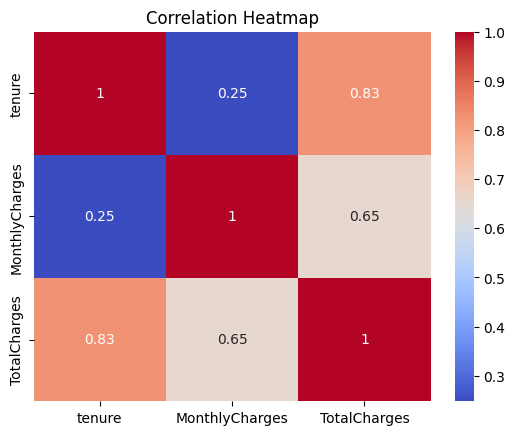

In [34]:
# Correlation Heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Observations (Step 4: Bivariate/Multivariate Analysis)**:

- TotalCharges and tenure are positively correlated
- TotalCharges and MonthlyCharges are positively correlated
  
**Customers more likely to churn**:-
  
  Demographics:
  - Senior citizens
  - Without a partner
  - Without dependents

  Services:
  - Having Internet services (especially Fiber optic)
  - Lacking online security or online backup or device protection or tech support (among those who have internet services)

  Account Info:
  - Tenure less than 10 months
  - Higher monthly charges
  - Month-to-month contract (2-year contract has lowest churn)
  - Using paperless billing
  - Paying via electronic check
 

**Note: No outliers were removed as no significant outliers were detected during univariate analysis**

---

### Step 5: Feature Engineering
- Encoding categorical columns and checking correlation with churn

In [38]:
# Making copy to work safely
df_FE = df.copy()

# Mapping Churn to 1 and 0
df_FE['Churn'] = df_FE['Churn'].map({'Yes': 1, 'No': 0}).astype(int)

# One-hot encode binary columns (drop one category)
binary_category_colnames = [col for col in cat_col_names if df_FE[col].nunique() == 2]
df_FE = pd.get_dummies(df_FE, columns=binary_category_colnames, drop_first=True)

# One-hot encode remaining categorical columns (without dropping)
remaining_cat_cols = df_FE.select_dtypes(include='category').columns
df_FE = pd.get_dummies(df_FE, columns=remaining_cat_cols)

# Confirm Changes
df_FE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7043 non-null   int64  
 1   MonthlyCharges                           7043 non-null   float64
 2   TotalCharges                             7043 non-null   float64
 3   Churn                                    7043 non-null   int64  
 4   gender_Male                              7043 non-null   bool   
 5   SeniorCitizen_1                          7043 non-null   bool   
 6   Partner_Yes                              7043 non-null   bool   
 7   Dependents_Yes                           7043 non-null   bool   
 8   PhoneService_Yes                         7043 non-null   bool   
 9   PaperlessBilling_Yes                     7043 non-null   bool   
 10  MultipleLines_No                         7043 no

In [39]:
# Correlation between each variable
df_FE_corr = df_FE.corr()

# Correlation of each variable with Churn
df_FE_corr['Churn'].sort_values(ascending = False)

Churn                                      1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
MonthlyCharges                             0.193356
PaperlessBilling_Yes                       0.191825
SeniorCitizen_1                            0.150889
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService_Yes                           0.011942
gender_Male                               -0.008612
MultipleLines_No phone service            -0.011942
MultipleLine

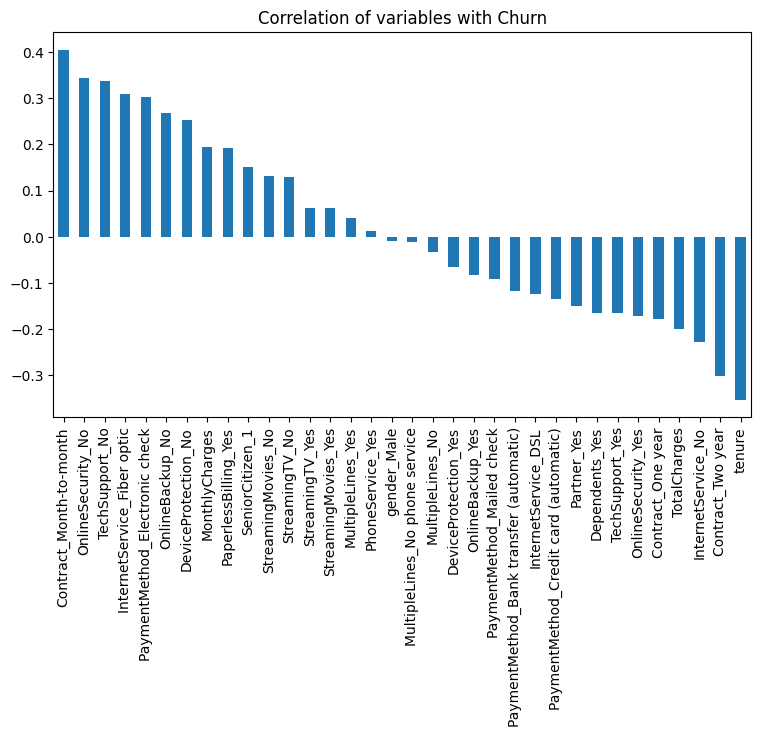

In [40]:
plt.figure(figsize=(9,5))

# Drop redundant variables and plot rest variables' correlation with Churn
df_FE_corr['Churn'].sort_values(ascending = False).drop(['Churn','OnlineBackup_No internet service',
         'StreamingMovies_No internet service', 'StreamingTV_No internet service',
         'TechSupport_No internet service', 'DeviceProtection_No internet service',
         'OnlineSecurity_No internet service']).plot(kind='bar')
plt.title('Correlation of variables with Churn')
plt.show()

**Observations (Step 5: Feature Engineering):**

Variables strongly correlated with Churn (|corr| > 0.2):-
- Contract_Month-to-month -> +0.41
- tenure -> –0.35
- OnlineSecurity_No -> +0.34
- TechSupport_No -> +0.34
- InternetService_Fiber optic -> +0.31
- PaymentMethod_Electronic check -> +0.30
- Contract_Two year ->  –0.30
- OnlineBackup_No -> +0.27
- DeviceProtection_No -> +0.25
- InternetService_No -> -0.23

This indicates that contract, payment and service-related have stronger association with churn compared to demographic features (gender, senior citizen, etc.).

---

### Step 6: Key Insights & Recommendations
- Key reasons behind churning and ways to retain customers.

#### **Key insights :-**

- **Churn rate** is 26.54%, indicating a need for retention strategies.

- **Service and Account-related features** are more strongly correlated to churn than demographic features
  ****
- **Service and Account-related features of Churners :-** (These customers churn more frequently)
     1. Month-to-month contracts (2-year contract has lowest churn)
     2. Short tenure (<10 months)
     3. Internet service (especially Fiber optic)
     4. Lacking online security, online backup, device protection or tech support (among those who have internet service)
     5. Paying via electronic check
     6. Higher monthly charges
     7. Using paperless billing

**** 
- **Demographic features of Churners:-** (These customers churn slightly more)
     1. Senior citizens (16% of the customers are senior citizens)
     2. Without a partner
     3. Without dependents

---


#### **Final Recommendations:-**

Based on the key insights from the analysis, the following strategies are recommended to reduce churn:

1. **Retain Month-to-Month Contract Customers:**
   - Offer discounts or incentives to move them to long-term (1 or 2-year) contracts.
2. **Increase Customer Tenure:**
   - Use loyalty programs or reward schemes to encourage long-term retention.
3. **Improve Internet Services & Promote Add-Ons:**
   - Customers having internet services (especially Fiber optic) are more likely to churn, particularly those lacking online security, tech support, online backup or device protection. The company should investigate potential issues (e.g., service quality, pricing) with Fiber optic and offer bundled packages or targeted offers to retain these customers.
5. **Address Electronic Check Payment Issues**
   - Check for payment failures or poor user experience. Encourage customers to switch to more stable payment methods (e.g., debit or credit card).
6. **Support Customers with High Monthly Charges**
   - Offer customized pricing or discounts to high-spending customers.
7. **Investigate Paperless Billing Issues:**
   - Check if these users face unclear bills or missed notifications. Offering small incentives or discounts can help retain these users.
6. **Support Senior Citizens:**
   - Although senior citizens make up a smaller portion of customers (16%), offering senior-friendly plans, discounts, or priority support can help retain them.
7. **Engage Single Customers (Without Partner/Dependents):**
   - Design loyalty programs, exclusive offers, or community engagement initiatives to increase their attachment to the brand.
  
**Note**: Strategies focused on contract, tenure, services, payment, charges, etc are likely to be more impactful in reducing churn than demographic-based strategies.
 